# Tugas Backpropagation Machine Learning

Single Layer Perceptron digunakan unntuk memecahkan masalah klasifikasi. Namun, tentu saja satu garis linear saja tidak cukup, maka dari itu dibutuhkan lebih dari satu garis linear untuk memecahkan masalah tersebut. Dibutuhkan lebih dari satu garis linear disebabkan karena adanya kelas target lebih dari 2, dan misalkan tersebar berdasarkan visualisasi, tentu saja tidak bisa digunakan hanya satu garis saja. Maka digunakan Multi Layer Perceptron. Perbedaan Multi layer Perceptron dengan Single Layer Perceptron ialah, pada MLP terdapat layer tambahan, yakni hidden layer, yang mana menjadi input untuk outputnya nanti. Untuk validasi, kita menggunakan datasplit, dengan data train sebanyak 80% dan data test sebanyak 20%. Multi Layer Perceptron menggunakan dua buah algoritma yang digunakan, pertama algoritma feedforward dan backpropagation. Feedforward langkahnya ialah: Menginisialisasi weight, bias,dll. Kemudian mengalikan input dengan weight kemudian ditambah bias agar mendapatkan input untuk hidden layer, lalu kemudian dimasukkan ke fungsi aktivasi.

Untuk backpropagate sendiri, dia menghitung dari nilai error, berarti dari perbedaan output dengan target.kemudian menghitung slope/gradient, kemudian menghitung delta output layer, kemudian baru mengupdate weight di input dan output layer, dan mengupdate bias di output dan input. Di sini kita menggunakan dua alfa, yakni 0.1 dan 0.8. Untuk arsitektur MLPnya sendiri menggunakan tiga layer, yang mana 1 nya ialah hidden layer.

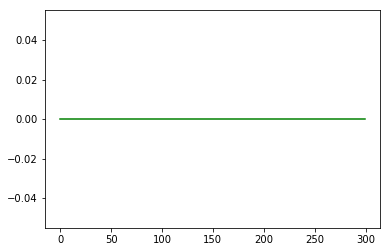

In [20]:
from random import seed
from random import randrange
import pandas as pd
import numpy as np
from csv import reader
from matplotlib import pyplot as plt


def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset


def str_column_to_float(dataset, column):
    for row in dataset:
        row[column]=float(row[column].strip())
        
def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
    for row in dataset:
        row[column] = lookup[row[column]]
    return lookup

def activate(row, theta):
    result=theta[0]
    for i in range (len(row)-1):
        result+=theta[i+1]*row[i]
        activation=1/(1+np.exp(-result))
    return activation

def accuracy_matriks(actual, predicted):
    correct=0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct+=1
    return correct/float(len(actual))*100.0

#prediction
def predict(row, theta):
    result=theta[0]
    for i in range (len(row)-1):
        result+=theta[i+1]*row[i]
        activation=1/(1+np.exp(-result))
    return 1.0 if activation>0.5 else 0.0 

#update weight


def activate(row, theta):
    result=theta[0]
    for i in range (len(row)-1):
        result+=theta[i+1]*row[i]
        activation=1/(1+np.exp(-result))
    return activation

def sigmoid (x):
    return 1/(1 + np.exp(-x))

#Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)

iris1 = load_csv('irisnew2.csv')

for i in range(len(iris1[0])-1):
    str_column_to_float(iris1, i)
    
str_column_to_int(iris1, len(iris1[0])-1)


alfa=0.1
n_folds=5
n_epoch=300

theta=[0.5, 0.5, 0.5, 0.5]
thetaout=[0.5,0.5,0.5,0.5]
dtheta=[0.0, 0.0, 0.0, 0.0]
biash=0.5
biasout=0.5
hidden_layer_input1=0
output_layer_input1=0
epoch2=list()
errorli=list()
epnum=0
for epoch in range(n_epoch):  
    epoch2.append(epnum) 
    for row in iris1:
        for i in range(len(row)-1):
            hidden_layer_input1=hidden_layer_input1+theta[i]*row[i]
        hidden_layer_input=hidden_layer_input1+biash
        hiddenlayer_activations = sigmoid(hidden_layer_input)
        for i in range(len(row)-1):
            output_layer_input1=output_layer_input1+thetaout[i]*row[i]
        output_layer_input= output_layer_input1+ biasout
        output = sigmoid(output_layer_input)
        
        #Backpropagation
        E = row[-1]-output
        slope_output_layer = derivatives_sigmoid(output)
        slope_hidden_layer = derivatives_sigmoid(hiddenlayer_activations)
        d_output = E * slope_output_layer
        Error_at_hidden_layer=d_output*thetaout[0]+d_output*thetaout[1]+d_output*thetaout[2]+d_output*thetaout[3]
        d_hiddenlayer = Error_at_hidden_layer * slope_hidden_layer
        for i in range(len(row)-1):
            thetaout[i] = thetaout[i]+hiddenlayer_activations*d_output *lr
        biasout = biasout+ d_output *lr
        for i in range(len(row)-1):
            theta[i] = theta[i]+ row[i]*d_hiddenlayer *lr
        bh =bh+d_hiddenlayer *lr
    errorli.append(E)
    epnum=epnum+1
    
plt.plot(epoch2, errorli, color='green')
plt.show()
